In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [2]:
df1 = pd.read_csv(r"/Users/vkc/Downloads/archive (2)/fraudTrain.csv")

In [3]:
df1.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


# Pre-processing

In [4]:
df1['merchant'] = df1['merchant'].str.replace('fraud_', '', regex=False)

### Removed redundant columns

In [5]:
df1.drop(['Unnamed: 0', 'trans_date_trans_time','last','street','dob','trans_num','unix_time','zip','cc_num','state'], axis=1, inplace=True)

In [6]:
df1.rename(columns={'first': 'Name','gender':'Gender','merchant':'Merchant','city':'City','amt':'Amount','category':'Category','city_pop':'Population','job':'Job'}, inplace=True)

In [7]:
df1['is_fraud'].value_counts()  #signifies highly imbalanced data

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [8]:
df1.shape

(1296675, 13)

Since data is too big we have taken 100k rows for analysis

In [9]:
df= df1[:100000]

In [10]:
df.shape

(100000, 13)

In [11]:
df['is_fraud'].value_counts()

0    99010
1      990
Name: is_fraud, dtype: int64

In [12]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
categorical_cols = ['Gender', 'Category', 'Merchant','Job','City','Name']
label_encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])
    
# Feature scaling
numerical_cols = ['Amount', 'lat', 'long','merch_long','merch_lat','Population']
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])


X = df.drop('is_fraud', axis=1)
y = df['is_fraud']

# Splitting the data

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
X_train

,Merchant,Category,Amount,Name,Gender,City,lat,long,Population,Job,merch_lat,merch_long
75220,429,12,-0.477319,305,0,463,-0.359100,0.040014,-0.292359,14,-0.401885,0.083030
48955,112,7,-0.175594,12,0,366,0.842701,1.318068,-0.277643,424,0.842048,1.374900
44966,540,5,-0.138992,22,0,170,-0.477855,0.837371,-0.254836,74,-0.404563,0.886771
13568,45,7,0.829515,88,1,522,0.924391,0.285405,0.131068,220,1.068186,0.260151
92727,112,7,-0.319259,130,1,680,-2.365201,0.587296,-0.283217,416,-2.423585,0.538324
...,...,...,...,...,...,...,...,...,...,...,...,...
6265,241,4,0.249027,224,0,551,0.866471,0.129595,-0.288018,26,0.962255,0.194700
54886,512,6,-0.040976,289,1,35,1.435704,-2.056172,-0.291420,115,1.469796,-2.072689
76820,290,8,-0.460526,145,1,837,-0.006225,0.601934,-0.277460,182,0.036119,0.638751
860,157,2,0.015366,47,0,157,1.585614,-1.959751,-0.293214,72,1.636359,-1.903440


### Handling Imbalance

In [15]:
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train,y_train)

In [16]:
X_train

,Merchant,Category,Amount,Name,Gender,City,lat,long,Population,Job,merch_lat,merch_long
0,429,12,-0.477319,305,0,463,-0.359100,0.040014,-0.292359,14,-0.401885,0.083030
1,112,7,-0.175594,12,0,366,0.842701,1.318068,-0.277643,424,0.842048,1.374900
2,540,5,-0.138992,22,0,170,-0.477855,0.837371,-0.254836,74,-0.404563,0.886771
3,45,7,0.829515,88,1,522,0.924391,0.285405,0.131068,220,1.068186,0.260151
4,112,7,-0.319259,130,1,680,-2.365201,0.587296,-0.283217,416,-2.423585,0.538324
...,...,...,...,...,...,...,...,...,...,...,...,...
158423,614,10,3.036805,291,0,176,0.146390,0.012843,-0.292270,336,0.220915,0.023587
158424,314,4,1.533891,229,0,766,-0.228406,0.179894,-0.229718,217,-0.199826,0.216000
158425,619,7,4.503206,277,1,304,-1.709689,0.583179,-0.288907,308,-1.816033,0.578712
158426,626,10,5.946798,34,0,386,-1.026874,0.267335,-0.279832,269,-0.911269,0.196968


In [17]:
y_train.value_counts()

0    79214
1    79214
Name: is_fraud, dtype: int64

# Non-Differential Privacy Models

## 1) Logistic Regression Model

In [18]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

y_pred = log_reg.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     19796
           1       0.11      0.78      0.20       204

    accuracy                           0.94     20000
   macro avg       0.56      0.86      0.58     20000
weighted avg       0.99      0.94      0.96     20000



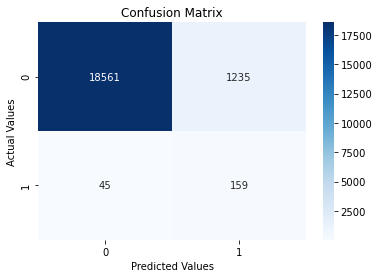

In [19]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

## 2) Random Forest Classifier

In [20]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     19796
           1       0.57      0.75      0.65       204

    accuracy                           0.99     20000
   macro avg       0.78      0.87      0.82     20000
weighted avg       0.99      0.99      0.99     20000



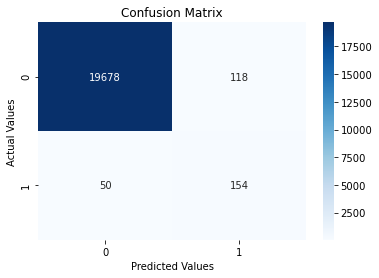

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

# Differential Privacy Models

In [22]:
from diffprivlib.mechanisms import Laplace
def apply_laplace_mechanism(data, epsilon, sensitivity):
    noise = np.random.laplace(0, sensitivity / epsilon, data.shape)
    return data + noise

# Define the epsilon (privacy budget) and sensitivity
epsilon = 10 
sensitivity = 1

columns_to_privatize = df.columns.difference(['is_fraud'])

# Apply differential privacy only to selected columns
dp_df = df.copy()
dp_df[columns_to_privatize] = dp_df[columns_to_privatize].apply(lambda col: apply_laplace_mechanism(col, epsilon, sensitivity))

In [23]:
dp_df

,Merchant,Category,Amount,Name,Gender,City,lat,long,Population,Job,merch_lat,merch_long,is_fraud
0,514.087565,8.118913,0.094574,155.043652,0.161951,499.991859,-0.487145,0.589302,-0.216459,359.197134,-0.530120,0.267251,0
1,240.978735,3.960158,0.304885,299.021638,-0.031728,575.903025,2.203985,-1.864419,-0.352882,413.987802,2.062753,-2.074881,0
2,389.978944,0.134290,1.069019,108.204634,0.911188,445.914901,0.415851,-1.755227,-0.294032,296.939148,0.889267,-1.603109,0
3,359.983533,1.895143,-0.536795,156.068913,1.242047,80.791741,1.456981,-1.855550,-0.167211,318.015868,1.864978,-1.565354,0
4,296.914709,9.020262,-0.074476,325.056353,0.876590,204.992002,-0.114962,0.883725,-0.479740,112.005603,-0.136171,0.554258,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,460.976856,6.139589,0.081506,166.993291,0.993202,407.021900,1.042019,-0.399255,-0.434144,250.961341,1.071471,-0.464299,0
99996,342.976006,9.934800,-0.692380,336.999145,0.840082,197.899309,-1.557786,-0.080957,-0.060486,216.082975,-1.666765,-0.243544,0
99997,575.983293,1.101632,-0.320586,235.110701,0.932592,21.416025,0.374610,0.401266,-0.435379,284.068901,0.380163,0.682646,0
99998,515.039697,5.159405,0.028101,153.122922,1.115052,583.902653,1.887024,-0.784835,-0.299175,4.912447,1.758557,-0.849380,0


In [24]:
dpX = dp_df.drop('is_fraud', axis=1)
dpy = dp_df['is_fraud']

In [25]:
dpX_train, dpX_test, dpy_train, dpy_test = train_test_split(dpX, dpy, test_size=0.2, random_state=42)

### Handling Imbalance

In [26]:
smote = SMOTE()
dpX_train, dpy_train = smote.fit_resample(dpX_train,dpy_train)

In [27]:
dpy_train.value_counts()

0    79214
1    79214
Name: is_fraud, dtype: int64

## 1) Logistic Regression 

In [28]:
log_reg = LogisticRegression()
log_reg.fit(dpX_train, dpy_train)

dpy_pred = log_reg.predict(dpX_test)

print("Classification Report:")
print(classification_report(dpy_test, dpy_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.94      0.97     19796
           1       0.12      0.77      0.21       204

    accuracy                           0.94     20000
   macro avg       0.56      0.86      0.59     20000
weighted avg       0.99      0.94      0.96     20000



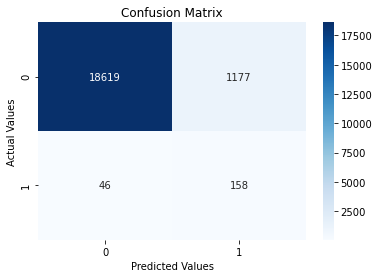

In [29]:
conf_matrix = confusion_matrix(dpy_test, dpy_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()

## 2) Random Forest

In [30]:
random_forest = RandomForestClassifier()
random_forest.fit(dpX_train, dpy_train)

dpy_pred = random_forest.predict(dpX_test)

print("Classification Report:")
print(classification_report(dpy_test, dpy_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19796
           1       0.50      0.72      0.59       204

    accuracy                           0.99     20000
   macro avg       0.75      0.86      0.79     20000
weighted avg       0.99      0.99      0.99     20000



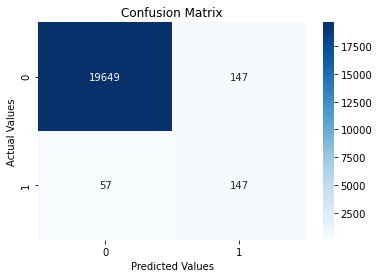

In [31]:
conf_matrix = confusion_matrix(dpy_test, dpy_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual Values")
plt.xlabel("Predicted Values")
plt.show()